# Pythonで統計学を学ぶ(4)
この内容は<A HREF="http://shop.ohmsha.co.jp/shop/shopdetail.html?brandcode=000000001781&search=978-4-274-06710-5&sort=" target="_blank">山田、杉澤、村井(2008)「R」によるやさしい統計学</A>を参考にしています。
<P>
この講義では、「統計的仮説検定」をとりあげます。
これは、統計的仮説検定の手順の理解と用語の習熟がねらいです。
また、代表的な統計的仮説検定、つまり標準正規分布を用いた検定、ｔ分布を用いた検定、無相関検定、カイ二乗検定について学びます。

<p>学習項目です:
<ul class="important">
<LI class="important"><A HREF="#RS04:necessity">統計的仮説検定の必要性</A></li>
<LI class="important"><A HREF="#RS04:testProcedure">統計的仮説検定の手順と用語</A></li>
<li class="important"><A HREF="#RS04:averageTest">標準正規分布を用いた検定(1つの平均値の検定: 母分散が既知)</A></li>
<li class="important"><A HREF="#RS04:tTest">t分布を用いた検定(1つの平均値の検定: 母分散が未知)</A></li>
<li class="important"><A HREF="#RS04:correlationTest">相関係数の検定(無相関検定)</A></li>
<li class="important"><A HREF="#RS04:chisquareTest">独立性の検定(カイ二乗検定)</A></li>
<LI class="important"><A HREF="#Functions">関数のまとめ</A>
<LI class="important"><A HREF="#Exercises">演習問題</A>
</ul>

## <A NAME="RS04:necessity">統計的仮説検定の必要性</A>

下の散布図を見てください(青色の円は、点の分布の状態を表すために描いたものです）:
![散布図](http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RS-4-1.png)
これをみると、この2つの変数 a と bの間には相関関係がないようにみえます。実際
$corrcoef(a,b)= -0.034$なので相関なしといえます。
ところが、a, bそれぞれから30点ずつ無作為抽出したデータ xa, xb (下にその散布図を示す)は、
ときに 0.378 という『弱い相関』を示すことがあります。
<BR>
参考: 無相関の母集団から相関するデータを作る<BR>
次が無相関の母集団から相関するデータを作った方法です:

In [ ]:
help(plt.Circle)

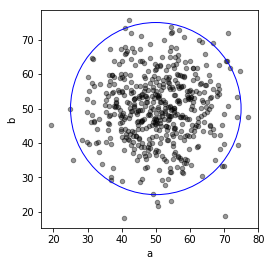

In [48]:
import matplotlib.pyplot as plt
import numpy.random as random
import matplotlib.patches as patches
%matplotlib inline
fig = plt.figure()
ax = plt.axes()
a = random.normal(50,10,500)
b = random.normal(50,10,500)
plt.scatter(a, b, s=20, c='k',alpha=0.4)
plt.xlabel('a')
plt.ylabel('b')

# 中心(50,50)で半径25の円を描画
circle=patches.Circle((50,50),25, fill=False, color='b')
ax.add_patch(circle)
aspect = (ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])                     
ax.set_aspect(aspect)  # 縦横の縮尺を調整
plt.show()


0.349755952421


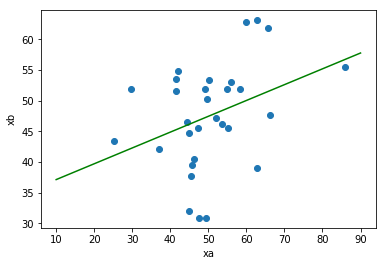

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
a = random.normal(50,10,500)
b = random.normal(50,10,500)
for _ in range(100):
    xa = random.choice(a,30)
    xb = random.choice(b,30)
    if (abs(np.corrcoef(xa,xb)[0,1]) > 0.30):
        break

plt.scatter(xa, xb)
plt.xlabel('xa')
plt.ylabel('xb')
x = np.linspace(10, 90, 10000)
lm = np.polyfit(xa, xb, 1)
plt.plot(x, lm[0]*x+lm[1],"g")
print(np.corrcoef(xa,xb)[0,1])

これは、実際には作為的に作られたデータです。しかし、あなたが発明した機器の有効性を示す論文や、あなたが作った薬品の効果を示す論文において、都合の良いデータだけを集めたのではないか、もしくは作為がないとしても、このデータは本当に偶然の結果であって多数のデータを取ればこのようなグラフにはならないのではないか、という疑いがかけられることがあります。
<P>
そのような疑いや批判には、(前の章で学んだように)『標本抽出が無作為抽出であること』(都合の良いデータを集めたわけではない)、そして(本章で学ぶように)『母集団に全く相関がないとしたら、抽出した標本からこのような結果が得られる可能性が非常に小さいということ』(多数のデータを集めても同じような結果が得られる確率が高い)を示さなければなりません。そして、
<font class="word"><B>統計的仮説検定</B></font>は確率に基づき、後者の主張を行うための方法です。(前者の「無作為抽出」は、統計による分析の大前提です)

## <A NAME="RS04:testProcedure">統計的仮説検定の手順と用語</A>

統計的仮説検定の一般的な手順を次の表に示します:

|手順|やること|
|:---|:---|
|1 | 母集団に関する<font class="word">帰無仮説</font>と<font class="word">対立仮説</font>を設定|
|2 |<font class="word">検定統計量</font>を選択|
|3 | <font class="word">有意水準 α</font>の値を決定|
|4 | データを収集した後、データから<font class="word">検定統計量の実現値</font>を求める|
|5| 結論: <font class="word">検定統計量の実現値</font>が<font class="word">棄却域</font>に入れば<font class="word">帰無仮説</font>を棄却し、<font class="word">対立仮説</font>を採択する。そうでなければ、<font class="word">帰無仮説</font>を採択する|

### 1. 帰無仮説と対立仮説

<ul class="important">
   <LI><font class="important">帰無仮説</font>：提案する手法が従来の手法と「差がない」、
提案する手法は「効果がない」という仮説---<font color="green">本来主張したいこととは逆の仮説</font>。
<font class="important">この仮説が棄却されることを目標として仮説検定を行う</font>。
<BR>
具体的には、母平均$\mu = 0$ (母平均は0である), 母相関係数$\rho =0$ (相関がない), 母平均の差$\mu_1 - \mu_2 = 0$ (差がない)というような仮説
	<LI> <font class="important">対立仮説</font>: 帰無仮説が棄却されたときに採択される仮説---
帰無仮説とは逆の仮説であり、実験などで<font class="important">示したい・主張したいことを表したもの</font>
<BR>
具体的には、母平均$\mu \neq 0$(母平均は<B>0でない</B>), 母相関係数 $\rho \neq 0$ (<B>相関がある</B>), 母平均の差$\mu_1 - \mu_2 \neq 0$ (<B>差がある</B>)というような仮説
</UL>
対立仮説の設定により、検定は次のどちらかで行う(両側検定の方がより厳しい条件であり、<font class="important">普通は両側検定</font>で行う):
<ul class="important">
   <LI><font class="important">片側検定</font>：対立仮説が、母平均$\mu > 0$(もしくは$\mu < 0$ )、
、母相関係数　$\rho > 0$(もしくは$\rho < 0$)、、母平均の差$\mu_1 > \mu_2$ (もしくは$\mu_1 < \mu_2$ )、の場合
   <LI><font class="important">両側検定</font>：対立仮説が、母平均μ≠0、母相関係数ρ≠0 、母平均の差　μ<sub>1</sub> - μ<sub>2</sub>≠ 0の場合<BR>
 要するに、両側検定では、例えば母平均$\mu \neq 0$を調べるには、母平均$\mu > 0$ と$\mu < 0$ の両方を調べなければならない
</UL>
<font class="important">帰無仮説が正しいものとして分析を行う</font>。
実際に得られたデータから計算された検定統計量の値によって採択を判断する。
<P>
<font class="rule">帰無仮説が正しいとしたとき</font>、検定統計量が、ほぼ起こり得ない値(それほど極端な値)であれば、帰無仮説を棄却する(つまり、<font color="green">本来の主張を表す対立仮説が採択される</font>)。そうでなければ(確率的に十分起こりうるような値であれば、帰無仮説を採択する(この場合は、<font color="green">本来主張したかった対立仮説が棄却されてしまう</font>)。


### 2. 検定統計量


* <font class="important">検定統計量</font>：統計的仮説検定のために用いられる標本統計量のこと。代表的な検定統計量の例: $t, \chi^2、F$
* <font class="important">検定統計量の実現値</font>：実際のデータ（手に入った標本）を基に計算してえられる具体的な値のこと
        
検定統計量の実現値は、<font class="rule">対立仮説に合うほど 0から離れた値を示す</font>


### 3. 有意水準と棄却域

対立仮説を採択するか決定するときに基準になるのが<font class="word">有意水準</font>(αで表されます)
<BR>
有意水準は<font class="rule">5％または1％</font>(α=0.05またはα=0.01)に設定することが多い(つまり、標本が100回に5回(5%の場合)以下にしか現れないデータであった---こんなことは偶然では起こりえない---、だから帰無仮説が成り立たないと考えて良いのではないか、という判断基準)
<BR>
帰無仮説が正しいものとして考えた時の標本分布を<font class="word">帰無分布</font>という---帰無分布に基づいて確率計算される
<BR>
帰無仮説のもとで、非常に生じにくい検定統計量の値の範囲を<font class="word">棄却域</font>という---帰無仮説が棄却される領域(だから、この範囲に入るのが『望ましい』)
<UL>
	<LI><font class="word">採択域</font>: 棄却域以外の部分---「帰無仮説が採択される領域」
	<LI><font class="word">臨界値</font>: 棄却域と採択域の境目の値
</UL>
棄却域に検定統計量の実現値が入ったら、帰無仮説を棄却する---本来主張したかったことが採択される！

<CENTER>
<TABLE>
<TR><TD align="center">
<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RS-4-3.png" target="_blank">
<IMG  class="fig" SRC="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RS-4-3.png" width="70%" hspace="10" />
</A>
</TD></TR>
 <TR><TD align="center">正規分布を帰無分布とした時の棄却域
 </TD></TR></TABLE>
</CENTER>


### 4 &amp; 5. 統計的仮説検定の結果の報告

検定統計量の実現値が棄却域に入った場合、「差がない」という帰無仮説を棄却し、
「差がある」という対立仮説を採択する。
<ul class="important">
検定結果は5% (または1%)水準で有意である<BR>
または
「<I>p</I> &lt; .05 (または <I>p</I> &lt; .01 )で<font class="important">有意差</font>が見られた 」
と記述する。
</ul>
帰無仮説が棄却できない場合は、「検定の結果、差が有意でなかった」または「有意差が認められなかった」と書く。


#### 課題4-1
あなたはランダムに配置された対象物(例えば地雷や石油や埋蔵金など)を衛星からのセンサーデータを元に限定された時間(例えば1時間)内に検出する機器を作成した。100個のデータに対し検出率は0.70であった。そして、その性能が従来の製品(検出率は0.60と宣伝されている)よりも優れていることを統計的仮説検定の手法により示したい。<BR>
どのような帰無仮説と対立仮説をたてればよいか、また検定方法は片側か両側か、有意水準はどのくらいに設定したらよいか、考えを述べよ。

回答欄:


### ｐ値

<font class="important">p値</font>：<B>帰無仮説が正しいという仮定のもとで</B>、標本から計算した検定統計量の実現値以上の値が得られる確率

p値が有意水準より小さい時に帰無仮説を棄却する

[参考: p値が小さいことの意味]
p値の大きさが対立仮説を採択する(帰無仮説を棄却する)決め手となります。p値が小さいということは、
『帰無仮説が正しいとすると』確率的にほとんど起こりえないことが起きた(有意水準が5%なら100回中5回以下、
1%なら100回中1回以下)ということを意味します。逆にp値が大きいということは、確率的にはよくあることが起きた(だから、この結果では差があるとはいえない)、
ということになります。

### 第1種の誤りと第2種の誤り
<UL>
 <LI><font class="word">第1種の誤り α</font>: 「<font class="rule">帰無仮説が真のとき</font>、これを<font class="rule">棄却</font>してしまう」誤りのこと<BR>
   この種の誤りを犯す確率が「有意水準」または「危険率」
 <LI><font class="word">第2種の誤り β</font>：「<font class="rule">帰無仮説が偽のとき</font>、これを<font class="rule">採択</font>する(棄却できない)」誤りのこと<BR>
本当は差があるのに「差がない」と判断してしまう誤り
</UL>


### 検定力

<font class="important">検定力</font>：<font class="rule">帰無仮説が偽の場合</font>、全体の確率1から第2種の誤りの確率(1 - β)を引いた確率 <BR>「第2種の誤りを犯さない確率」とも、つまり間違っている帰無仮説を正しく棄却できる確率のこと　


<hr noshade size=3>
## <A NAME="RS04:averageTest">標準正規分布を用いた検定(1つの平均値の検定: 母分散が既知)</A>


正規母集団 $N(\mu, \sigma^2)$ から無作為に標本を抽出する（サンプルサイズを$n$ とする)と
<UL class="other">
　　 標本平均の分布も正規分布<BR>
　　 標本平均の平均は [ア] 、分散は [イ ]　（<font color="red">問題</font>：ア、イに当てはまる記号を書け---課題4-2)
</UL>
これを標準化したものを<font class="word">検定統計量</font>とする($\bar{X}$は標本データの平均):
$$Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$$

#### 課題4-2
  正規母集団 $N(\mu, \sigma^2)$から無作為に標本を抽出したとき、
理論的に標本平均の平均と、分散がそれぞれどのように表されるか、書きなさい(つまり、上の[ア], [イ]の箇所を補うこと)。

またこれを標準化して得られる検定統計量がZで表されている理由を答えなさい。

[ヒント]
[標本分布を求める](http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Python-statistics3.html#makingSample)の項を読みなおしてください。また、標準化については[標準化](http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Python-statistics1.html#RS01:normalization)の項を見てください。

回答欄:

---
#### Pythonを使った実習

<B>例題:</B>「心理学テスト」が$N(12, 10)$の正規分布に従うものとする。
次のデータ(<A NAME="SampleData">「指導法データ」</A>と呼ぶ)はこの母集団から無作為抽出した標本と考えてよいかどうかを判定せよ

In [36]:
from __future__ import division
import numpy as np
SampleData = np.array([13,14,7,12,10,6,8,15,4,14,9,6,10,12,5,12,8,8,12,15])

次のステップで行う:<OL class="other">
 <LI>帰無仮説と対立仮説をたてる: 帰無仮説は「無作為抽出した標本と考えて良い」、つまり$\mu = 12$<BR>
     対立仮説は「無作為抽出した標本ではない」、つまり$\mu \neq 12$
 <LI>検定統計量の選択: 標本データを標準化した値(Zで表す)
 <LI>有意水準の決定: 両側検定で、有意水準 5%、つまり$\alpha=0.05$
 <LI>検定統計量の実現値の計算:

In [ ]:
z =  (np.mean(SampleData) - 12) / (10.0/len(SampleData))**0.5             # 標準化
z

 <LI>帰無仮説の棄却か採択かの決定: <B>帰無仮説によればこの標本は正規分布に従う</B>。そこで<font class="word">scipy.stats</font>モジュールのppf関数で棄却の臨界値を求める、
もしくは<font class="word">cdf</font>関数でp値を求める
   <UL class="other">
	<LI><font class="word">下側確率</font>：標準正規分布に従う確率変数$Z$を例にとると、$Z$がある値$\alpha$以下となる確率 $Prob(Z \leq \alpha)$
	<LI><font class="word"> 上側確率</font>：標準正規分布に従う確率変数$Z$を例にとると、$Z$がある値$\alpha$より大きくなる確率  $Prob(Z > \alpha)$
   </UL>

In [ ]:
import scipy.stats as st
st.norm.ppf(0.025)    # 下側確率0.05/2 = 0.025となるzの値を求める
# 下側確率であるから、この値よりもZ値が小さければ棄却される

In [ ]:
# 上側確率 1 - 0.05/2 = 0.975となるzの値を求める
st.norm.ppf(0.975)  
# 上側確率であるから、この値よりもZ値が大きければ棄却される

In [ ]:
# 参考
help(st.norm.ppf)

この結果、棄却域は $Z < -1.959964$ または $Z >  1.959964$となるので、$Z$の値は棄却域に入る。
よって、結論「有意水準5%において、指導法データは心理学テスト(という母集団)から無作為抽出した標本とはいえない」。
<BR>
なお、関数cdfを用いて、直接p値を求めることもできる:


In [ ]:
st.norm.cdf(-2.828427)   # 下側確率
# 下側確率とすれば、p値は0.0023という小さな値(<  0.05)

In [ ]:
st.norm.cdf(2.828427)   # 上側確率

In [ ]:
# 両側検定なので2倍する
2*st.norm.cdf(-2.828427)
# 両側検定であるから2倍したp値は0.0047という小さな値(< 0.05)

In [ ]:
# 参考
help(st.norm.cdf)

#### 課題4-3

  標準正規分布のグラフを書き、有意水準5%の棄却域を黄色で表し、例題のZ値がどこに位置するかを重ね書きした図を作成せよ。

[ヒント]
前節の正規分布</A>の「正規分布グラフに領域を表示する関数」で紹介した関数を拡張修正して用いる。
Z値以下の領域をオレンジ色で表すと次のような図が得られる:<BR>
<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RS-4-E1.png" target="_blank">
<IMG  class="fig" SRC="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RS-4-E1.png" width="30%" hspace="10" align="center" /></A>

## <A NAME="RS04:tTest">t分布を用いた検定(1つの平均値の検定: 母分散が未知)</A>

正規母集団からの無作為標本であっても、母集団の分散σ<sup>2</sup>がわからない場合、
先の方法が使えません---先の検定で用いた検定統計量が計算できないからです
<BR>
そこで母分散の平方根σ の代わりに、標本から求められる不偏分散の平方根$\hat{\sigma}$を使い、
$ t = \frac{\bar{X}-\mu}{\hat{\sigma}/\sqrt{n}} $
を検定統計量とする。
これは<font class="word">自由度(df)</font> $n-1$ の<font class="word">t分布</font>に従う

<UL class="important">
<LI><font class="important">t分布</font>：統計学でよく利用される、正規分布の形に似た左右対称・山形の確率分布
<LI><font class="important">自由度(df)</font>：t分布の形状を決める
<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RS-4-5.png" target="_blank">
<IMG  class="fig" SRC="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RS-4-5.png" width="70%" hspace="0" align="right" />
</A>

#### Pythonを使った実習

<B>例題:</B>「心理学テスト」が平均12の正規分布に従うものとする(<FONT class="other">分散は未知!</FONT>)。
<A HREF="#SampleData">前項にあげた「指導法データ」</A> (SampleData) が、この母集団から無作為抽出した標本と考えてよいかどうかを判定せよ

次のステップで行う:<OL class="other">
 <LI>帰無仮説と対立仮説をたてる: 帰無仮説は「無作為抽出した標本と考えて良い」、つまり$\mu=12$<BR>
     対立仮説は「無作為抽出した標本ではない」、つまり$\mu \neq 12$
 <LI>検定統計量の選択: <font class="rule">標本の不偏分散の平方根 $\hat{\sigma}$ を用い</font>、 
	$ t = \frac{\bar{X}-\mu}{\hat{\sigma}/\sqrt{n}} $を検定統計量とする
 <LI>有意水準の決定: 両側検定で、有意水準 5%、つまり$\alpha=0.05$
 <LI>検定統計量の実現値の計算:
     
```
 t =  (np.mean(SampleData) - 12) / (np.var(SampleData, ddof=1)/len(SampleData))**0.5             # 検定量
```
 <LI> 帰無仮説の棄却か採択かの決定: <B>帰無仮説によればこの検定統計量は自由度$df=n-1=19$のt分布に従う</B>

```
st.t.ppf(0.025,19)     # df=19、下側確率0.05/2 = 0.025となるtの値を求める(scipy.stats.tモジュールのppf関数
⇒ -2.0930240544082634
# 下側確率であるから、この値よりもt値が小さければ棄却される)
st.t.ppf(0.975,19)     # df=19、上側確率1-0.05/2 = 0.975となるtの値を求める(scipy.stats.tモジュールのppf関数
# 上側確率であるから、この値よりもt値が大きければ棄却される
⇒ 2.093024054408263
```
     
この結果、棄却域は $t < -2.093024$ または $t > 2.093024$となるので、$t$の値は棄却域に入る。<BR>
関数 cdf を用いて、直接p値を求めることもできる:
    
```
st.t.cdf(-2.616648,19)   # 下側確率 (scipy.stats.tモジュールのcdf関数)
# 下側確率とすれば、p値は0.0085 という小さな値(< 0.05)
⇒ 0.0084854604500293768
print(st.t.cdf(2.616648,19))  # 上側確率
⇒ 0.99151453955
print(2*st.t.cdf(-2.616648,19))    # 両側検定なので2倍する
⇒ 0.0169709209001
# 両側検定より２倍したp値は0.017という小さな値(< 0.05)
```
<LI>よって、結論<FONT color="brown">「有意水準5%において、指導法データは心理学テスト(という母集団)から無作為抽出した標本とはいえない」</FONT>。
    </OL>

In [ ]:
# 以上の実行
t =  (np.mean(SampleData) - 12) / (np.var(SampleData, ddof=1)/len(SampleData))**0.5             # 検定量
print("t = %f" % t)

In [ ]:
import scipy.stats as st
st.t.ppf(0.025,19)     # df=19、下側確率0.05/2 = 0.025となるtの値を求める(scipy.stats.tモジュールのppf関数
# 下側確率であるから、この値よりもt値が小さければ棄却される)

In [ ]:
st.t.ppf(0.975,19)     # df=19、上側確率1-0.05/2 = 0.975となるtの値を求める(scipy.stats.tモジュールのppf関数
# 上側確率であるから、この値よりもt値が大きければ棄却される

In [ ]:
st.t.cdf(-2.616648,19)   # 下側確率 (scipy.stats.tモジュールのcdf関数)
# 下側確率とすれば、p値は0.0085 という小さな値(< 0.05)

In [ ]:
print(st.t.cdf(2.616648,19))  # 上側確率
print(2*st.t.cdf(-2.616648,19))    # 両側検定なので2倍する
# 両側検定より２倍したp値は0.017という小さな値(< 0.05)

In [ ]:
help(st.t.ppf)

In [ ]:
help(st.t.cdf)

----
Pythonでt検定するための関数: 

以上のことをすべてやってくれる関数がscipy.statsモジュールのttest_1samp関数である。

In [49]:
import scipy.stats as st
# help(st.ttest_1samp)

「指導法データ」 (SampleData) を用いてその使い方を示す: <T>st.ttest_1samp(データ,$\mu$)</T>

In [ ]:
import scipy.stats as st
st.ttest_1samp(SampleData,12.0)

この表示から、t値が-2.617、p値が0.017 (両側検定)であることが得られる。

<FONT color="red">注意:関数を実行して値を出して終わりではない</FONT>. 次のような結論を書くこと<BR>
    <QUOTE> $p < 0.05$であることから、帰無仮説は棄却された。つまり、有意水準5%において、指導法データは心理学テスト(という母集団)から無作為抽出した標本とはいえない。 </QUOTE>

---

## <A NAME="RS04:correlationTest">相関係数の検定(無相関検定)</A>

<font class="important">無相関検定</font>：「母集団において相関が0である」と設定して行う検定
<BR>
母集団相関係数(母相関)に関する検定を行うときは、標本相関係数ｒから次を求めて検定統計量とする:
$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$

#### Pythonを使った実習

<B>例題:</B>以下で与えられる「統計学テスト1」(StatTest1)と「統計学テスト2」(StatTest2)の得点の相関係数の検定を行え。有意水準は5%とする。

In [73]:
import numpy as np
StatTest1 = np.array([6,10,6,10,5,3,5,9,3,3,11,6,11,9,7,5,8,7,7,9])
StatTest2 = np.array([10,13,8,15,8,6,9,10,7,3,18,14,18,11,12,5,7,12,7,7])

次のステップで行う:<OL>
<LI>帰無仮説と対立仮説をたてる: 帰無仮説は$\rho = 0$、つまり母相関$=0$<BR>
     対立仮説は「$\rho \neq 0$」、つまり母相関$\neq 0$
 <LI>検定統計量の選択: $t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$
 <LI>有意水準の決定: 両側検定で、有意水準 5%、つまり$\alpha = 0.05$
 <LI>検定統計量の実現値の計算:
     
```
SampleCorr = np.corrcoef(StatTest1, StatTest2)[0,1]
print("Sample Correlation = %f" % SampleCorr)  # 標本相関
⇒ Sample Correlation = 0.749659
SampleSize = len(StatTest1)
tDividend =  SampleCorr * (SampleSize - 2.0)**0.5
tDivider = (1.0 - SampleCorr**2)**0.5
t = tDividend/tDivider
⇒ t statistics = 4.805707
```
<LI>帰無仮説の棄却か採択かの決定: <B>帰無仮説によればこの検定統計量は自由度$df=n-2=18$のt分布に従う</B>
    
```
import scipy.stats as st
print(st.t.ppf(0.025,18))    # df=18、下側確率0.05/2 = 0.025となるtの値を求める
⇒ -2.10092204024
# 下側確率であるから、この値よりもt値が小さければ棄却される
print(st.t.ppf(0.975,18))    # df=18、上側確率 1 - 0.05/2 = 0.975となるtの値を求める
⇒ 2.10092204024
# 上側確率であるから、この値よりもt値が大きければ棄却される
```
<LI>この結果、棄却域は $t < -2.101$ または $t > 2.101$となるので、tの値は棄却域に入る。
    よって<FONT color="brown">結論「統計学テスト1(StatTest1)と統計学テスト2(StatTest2)は有意水準5％において強い相関(相関係数0.75)がある」</FONT>
</OL>

In [ ]:
from __future__ import division
import numpy as np
SampleCorr = np.corrcoef(StatTest1, StatTest2)[0,1]
print("Sample Correlation = %f" % SampleCorr)  # 標本相関
SampleSize = len(StatTest1)
tDividend =  SampleCorr * (SampleSize - 2.0)**0.5
tDivider = (1.0 - SampleCorr**2)**0.5
t = tDividend/tDivider
print("t statistics = %f" % t)

In [ ]:
import scipy.stats as st
print(st.t.ppf(0.025,18))    # df=18、下側確率0.05/2 = 0.025となるtの値を求める
# 下側確率であるから、この値よりもt値が小さければ棄却される
print(st.t.ppf(0.975,18))    # df=18、上側確率 1 - 0.05/2 = 0.975となるtの値を求める
# 上側確率であるから、この値よりもt値が大きければ棄却される


なおscipy.stats.tモジュールのcdf関数を用いて、直接p値を求めることもできる:

In [ ]:
print(st.t.cdf(t,18))  # 上側確率
print( (1.0  - st.t.cdf(t,18))*2.0 )  # 両側検定なので2倍する
# 両側検定により２倍したp値は0.00014という小さな値(< 0.05)

---
Pythonで無相関検定するための関数: scipy.stat.pearsonr

In [50]:
import scipy.stats as st
# help(st.pearsonr)

In [ ]:
import scipy.stats as st
SampleCorr = st.pearsonr(StatTest1, StatTest2)
print(SampleCorr)

pearsonr関数の出力の第一要素は標本相関係数(0.75)、第二要素は両側検定によるp値である。

---
## <A NAME="RS04:chisquareTest">独立性の検定(カイ自乗検定)</A>

２つの質的変数が独立かどうかを確かめる---
<font class="word">独立</font>とは「2つの質的変数に連関がない」こと
<ul class="important">
 <LI><font class="word">独立性の検定</font>：２つの質的変数間の連関の有意性を調べる検定<BR>
  <LI><font class="word">期待度数</font>：2つの変数の間に連関がない(独立である)という帰無仮説のもとで、帰無仮説が正しければ（連関がなければ）これくらいの度数をとるだろうと期待される度数<BR>
    クロス集計表におけるセルの期待度数 = (セルが属する行の周辺度数 ×セルが属する列の周辺度数)÷総度数
<LI><font class="word">$\chi^2$(カイ2乗)</font>という確率分布を利用するため、カイ自乗(2乗)検定ともいう。
   <LI><font class="word">独立性の検定における検定統計量の式</font> 
$$ \chi^2 = \frac{(O_1-E_1)^2}{E_1}+\frac{(O_2-E_2)^2}{E_2}+\cdots+\frac{(O_k-E_k)^2}{E_k}$$
<BR>
   $O_1 \sim O_k$は観測度数、$E_1 \sim E_k$は期待度数
  <LI>カイ二乗分布: <CENTER>
<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RS-4-8.png" target="_blank">
<IMG  class="fig" SRC="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RS-4-8.png" align="top" width="40%" hspace="5" align="right"  /></A>
</CENTER>
</ul>

#### Pythonを使った実習

<B>例題:</B>20名の学生に対し数学(Math)と統計学(Stat)の好き嫌いをアンケート調査した結果が以下。このことから、一般に数学と統計学の好き嫌いの間に有意な連関があるといえるかどうか、有意水準5%で検定せよ。

```
Math = np.array(["嫌い","嫌い","好き","好き","嫌い","嫌い","嫌い","嫌い","嫌い","好き","好き",
	"嫌い","好き","嫌い","嫌い","好き","嫌い","嫌い","嫌い","嫌い"])
Stat = np.array(["好き","好き","好き","好き","嫌い","嫌い","嫌い","嫌い","嫌い","嫌い","好き",
	"好き","好き","嫌い","好き","嫌い","嫌い","嫌い","嫌い","嫌い"])
```

このクロス集計表は以下:
<CENTER>
<table border=4 width=600 align=center>
  <tr bgcolor="#cccccc">
    <th width=25%>  </th>
    <th width=25%>統計学好き</th>
    <th width=25%>統計学嫌い</th>
    <th width=25%>合計</th>
  </tr>
  <tr>
   <TD align="center">数学好き</TD>   <TD>Expectation_11</TD>     <TD>Expectation_12</TD>    <TD align="center">6</TD>
  </tr>
    <tr>
   <TD align="center">数学嫌い</TD>   <TD>Expectation_21</TD>     <TD>Expectation_22</TD>    <TD align="center">14</TD>
  </tr>
  <tr>
   <TD  align="center">計</TD>   <TD align="center">8</TD>     <TD align="center">12</TD>    <TD align="center">20</TD>
  </tr>
 </table>
</CENTER>
マスのことを<font class="word">セル</font>、セルに書かれた数値を<font class="word">観測度数</font>、
観測度数を各々、列・行で合計したものを<font class="word">周辺度数</font>、周辺度数の合計を<font class="word">総度数</font>と呼ぶ
<BR>
<font class="rule">自由度 df = (行の数-1)×(列の数-1)</font>

In [ ]:
Math = np.array(["嫌い","嫌い","好き","好き","嫌い","嫌い","嫌い","嫌い","嫌い","好き","好き",
    "嫌い","好き","嫌い","嫌い","好き","嫌い","嫌い","嫌い","嫌い"])
Stat = np.array(["好き","好き","好き","好き","嫌い","嫌い","嫌い","嫌い","嫌い","嫌い","好き",
    "好き","好き","嫌い","好き","嫌い","嫌い","嫌い","嫌い","嫌い"])
import pandas as pd
data = pd.DataFrame({ 'Stat':Stat, 'Math':Math})
table = pd.crosstab(data.Math,data.Stat,margins=True)  # クロス集計表を作る
table

次のステップで行う:<OL>
<LI>帰無仮説と対立仮説をたてる: 帰無仮説H<sub>0</sub>は、「数学と統計学の2つの変数は独立(連関なし)」<BR>
     対立仮説H<sub>1</sub>は「「数学と統計学の2つの変数は独立(連関なし)」
 <LI>検定統計量の選択: $$ \chi^2 = \frac{(O_1-E_1)^2}{E_1}+\frac{(O_2-E_2)^2}{E_2}+\cdots+\frac{(O_k-E_k)^2}{E_k}$$
 <LI>有意水準の決定: 5%とする(片側検定---カイ二乗検定は棄却域が一つしかない)
 <LI>検定統計量の実現値の計算:
     </OL>

In [ ]:
Expectaion_11 = 8*6/20.0
Expectaion_12 = 12*6/20.0
Expectaion_21 = 8*14/20.0
Expectaion_22 = 12*14/20.0

ExpectedFrequency = np.array([Expectaion_11, Expectaion_21,Expectaion_12,Expectaion_22])
ObservedFrequency = np.array([4,4,2,10])
ChiSqElements = (ObservedFrequency - ExpectedFrequency)**2 / ExpectedFrequency
ChiSq = np.sum(ChiSqElements)   #  検定統計量
print(ChiSq)

<BR>5. 帰無仮説の棄却か採択かの決定: <B>帰無仮説によればこの検定統計量は自由度$df=1$の$\chi^2$分布に従う</B>

In [ ]:
import scipy.stats as st
# help(st.distributions.chi2.ppf)

In [ ]:
st.distributions.chi2.ppf(0.95,1)  # 自由度1のカイ二乗分布で確率0.95となるχ2の値を求める
# これが棄却域を定める---この値よりもχ2値が大きければ棄却される
# カイ二乗分布は『上側』のみ

この結果、棄却域は  $\chi^2 >  3.84$ となり、この例題における$\chi^2$の値(=2.54)は棄却域に入っていない、つまり帰無仮説は棄却されず、採択される。
よって<FONT color="brown">結論「有意水準5%において、数学と統計学の2つの変数は<B>独立ではない(連関がない)</B>」</FONT>。
<BR>
なお、cdf関数を用いて、直接p値を求めることもできる:

In [ ]:
help(st.distributions.chi2.cdf)

In [ ]:
1.0 - st.distributions.chi2.cdf(ChiSq,1)  # 上側確率
# p値が有意水準0.05よりも大きいので、帰無仮説は棄却されない

---
Pythonでカイ二乗検定するための関数<font class="rule">chisquare</font>(scipy.statsモジュール):  

In [ ]:
help(st.chisquare)

In [ ]:
ExpectedFrequency = np.array([Expectaion_11, Expectaion_21,Expectaion_12,Expectaion_22])
ObservedFrequency = np.array([4,4,2,10])
st.chisquare(ObservedFrequency, f_exp =ExpectedFrequency, ddof=2) # 自由度の計算に使うddofの値に注意

## <A NAME="RS04:sampleSize">サンプルサイズの影響</A>

標本における連関の大きさが全く同じであっても、サンプルサイズが異なると検定の結果が変わることがある<BR>
サンプルサイズが大きくなると、有意になりやすい---統計的仮説検定一般にいえる性質

In [160]:
import pandas as pd
data = { 'Mastered': [16,12], 'NotMastered':[4,8]}   # ある科目の履修 vs 未履修
df = pd.DataFrame(data)
df.index=['Humanities','Technicals']  # 文系 vs 理系
df # クロス集計表

Mastered  NotMastered
Humanities        16            4
Technicals        12            8

In [165]:
Exp_11 = sum(df['Mastered'])*sum(df.loc['Humanities',:])/40.0
Exp_12 = sum(df['NotMastered'])*sum(df.loc['Humanities',:])/40.0
Exp_21 = sum(df['Mastered'])*sum(df.loc['Technicals',:])/40.0
Exp_22 = sum(df['NotMastered'])*sum(df.loc['Technicals',:])/40.0

In [ ]:
ExpectedFrequency = np.array([Exp_11, Exp_12,Exp_21,Exp_22])
ObservedFrequency = np.array([16,4,12,8])
st.chisquare(ObservedFrequency, f_exp =ExpectedFrequency, ddof=2) # 自由度の計算に使うddofの値に注意
# p値=0.17なので帰無仮説は棄却されない → 連関なし

In [167]:
data10 = { 'Mastered': [160,120], 'NotMastered':[40,80]}   # ある科目の履修 vs 未履修 --- 前の10倍
df = pd.DataFrame(data10)
df.index=['Humanities','Technicals']  # 文系 vs 理系
df # クロス集計表

Mastered  NotMastered
Humanities       160           40
Technicals       120           80

In [168]:
Exp_11 = sum(df['Mastered'])*sum(df.loc['Humanities',:])/400.0
Exp_12 = sum(df['NotMastered'])*sum(df.loc['Humanities',:])/400.0
Exp_21 = sum(df['Mastered'])*sum(df.loc['Technicals',:])/400.0
Exp_22 = sum(df['NotMastered'])*sum(df.loc['Technicals',:])/400.0

In [ ]:
ExpectedFrequency = np.array([Exp_11, Exp_12,Exp_21,Exp_22])
ObservedFrequency = np.array([160,40,120,80])
st.chisquare(ObservedFrequency, f_exp =ExpectedFrequency, ddof=2) # 自由度の計算に使うddofの値に注意
# p値=0.000013なので帰無仮説は棄却される→連関あり

---
## <A NAME="Functions">関数のまとめ</A>
注:  numpyをnp, numpy.randomを random、 matplotlib.pyplotをplt、pandasをpd、scipy.statsをstと略記する

|目的 | 関数名とモジュール       | 使い方|
|:---|:---|:---|
|指定された範囲からランダム抽出|random.choice(配列,個数)| random.choice(range(10),5)|
|標準正規分布で下側確率に対応する確率分布関数の値 | st.norm.ppf(p) | st.norm.ppf(0.025) # $Prob(Z < q)=0.025$となるqの値|
|標準正規分布で下側確率(p値)を求める|st.norm.cdf(z)|st.norm.cdf(1.96) # $Prob(Z < 1.96)$の値(p値)|
|t分布で下側確率に対応する確率分布関数の値 | st.t.ppf(p,自由度) | st.t.ppf(0.025,19) # 自由度19のt分布で$Prob(Z < q)=0.025$となるqの値|
|t分布で下側確率(p値)を求める|st.t.cdf(p,df)|st.t.cdf(1.96,19) # 自由度19のt分布で$Prob(Z < 1.96)$の値(p値)|
|t検定を行う|st.ttest_1samp(データ,$\mu$)|st.ttest_1samp(np.array([13,14,7,12,10,6,8,15,4,14,9,6,8,8,12,15]),12.0) # $\mu=12$の検定 |
|無相関検定を行う|st.pearsonr(データ1,データ2)|st.pearsonr(StatTest1, StatTest2) # 出力の第一要素は標本相関係数、第二要素は両側検定によるp値|
|カイ二乗分布の確率密度関数|st.distributions.chi2.pdf(x,自由度) | plt.plot(x,st.distributions.chi2.pdf(x,3)) \# 自由度3の$\chi^2$分布関数の描画|
|カイ二乗分布で上側確率に対応する値を求める|st.distributions.chi2.ppf(p,自由度)|st.distributions.chi2.ppf(0.95,2) # 自由度2で$Prob(Z < q)=0.95$となるq値を求める|
|カイ二乗分布で上側確率を求める|1-st.distributions.chi2.cdf(z,自由度)|1-st.distributions.chi2.cdf(3.5,1) # 自由度1のカイ2乗分布で$Prob(Z \geq 3.5)$となる確率|
|カイ二乗検定を行う(独立性の検定)|st.chisquare(観測度数リスト, f_exp =期待度数リスト, ddof=n) #n=観測個数-1-自由度 |st.chisquare(ObservedFrequency, f_exp =ExpectedFrequency, ddof=2) |


## <A NAME="Exercises">演習問題4</A>

#### 演習問題4-1
次のデータ(単位はcm)は、平均170cmの正規分布に従う20歳男性の母集団からの無作為抽出と考えてよいかどうかを検定せよ。

In [171]:
import numpy as np
Height = np.array([165,150,170,168,159,170,167,178,155,159,161,162,166,171,155,160,168,172,155,167])

#### 演習問題4-2

以下に示すデータにおいて、勉強時間(StudyHours)と定期試験の成績(ExamResult)の相関係数の無相関検定を行え。

In [170]:
import numpy as np
StudyHours = np.array([1, 3, 10, 12, 6, 3, 8, 4, 1, 5])
ExamResult = np.array([20, 40, 100, 80, 50, 50, 70, 50, 10, 60])

#### 演習問題4-3

先の演習問題4-2のデータに対し、ピアソンの相関係数とスピアマンの順位相関係数を求め、
さらに無相関検定も行え。<BR>

In [51]:
import scipy.stats as st
help(st.spearmanr)

#### 演習問題4-4

以下に示す演習問題2-2のデータに対し、カイ二乗検定を行え。


In [179]:
import numpy as np
FoodTendency = np.array(["洋食","和食","和食","洋食","和食","洋食","洋食","和食","洋食","洋食","和食",
                         "洋食","和食","洋食","和食","和食","洋食","洋食","和食","和食"])
                         
TasteTendency = np.array(["甘党","辛党","甘党","甘党","辛党","辛党","辛党","辛党","甘党","甘党","甘党",
                         "甘党","辛党","辛党","甘党","辛党","辛党","甘党","辛党","辛党"])

#### 演習問題4-5

次のそれぞれのデータについて無相関検定を行え。

In [ ]:
#5-1
import numpy as np
Kokugo = np.array([60,40,30,70,55])
Shakai = np.array([80,25,35,70,50])

In [ ]:
#5-2 --- 単純に(5-1)のデータを2回繰り返したもの
Kokugo2 = np.array([60,40,30,70,55,60,40,30,70,55])
Shakai2 = np.array([80,25,35,70,50,80,25,35,70,50])

#### 演習問題4-6

<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/SampleData/badmington.csv" target="_blank">badmington.csv</A>は区切り記号がコンマのCSVのファイルであり、
バドミントンのラケットの重量xと硬度yの表</A>(出典: 内田(2010)「すぐに使えるRによる統計解析とグラフの応用」東京図書)が収められている。このデータをデータフレームとして読み込み、硬度(y)と重量(x)の相関係数を算出し、無相関の検定を行え。

[参考] 区切り記号がコンマのcsvファイルを読み込み、その内容をデータフレームとして取り込むには、pandasモジュールの<B>read_csv</B>関数を用いる。